<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction**

**OBJECTIVE**
* Explore and visualize the dataset to gain insights into the relationship between salary and years of experience.

*   Build a model that can predict the salary of a person based on their years of experience
* Evaluate the accuracy of the model



**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**LOADING THE DATASET**

In [ ]:
df=pd.read_csv("/content/Salary.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


**PREPROCESSING**

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


**DATA CLEANING**

In [ ]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**SEPARATING X AND Y**

In [ ]:
X=df.iloc[:,:-1].values
X


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
y=df.iloc[:,-1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

**DATA VISUALIZATION**

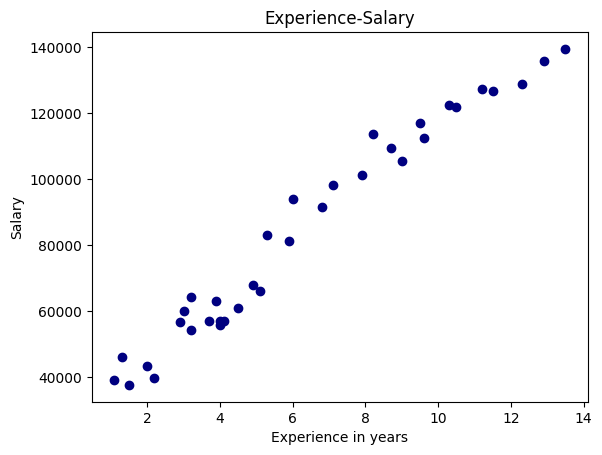

In [ ]:
plt.scatter(X,y,color='navy')
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.title("Experience-Salary")
plt.show()

 Observation: The dots are very close in a diagonal.So  the two variables being plotted are strongly correlated.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((24, 1), (11, 1))

In [ ]:
y_train.shape,y_test.shape

((24,), (11,))

**MODEL SELECTION**

**Linear Regression**


*   Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, where the dependent variable can be predicted as a linear combination of the independent variables.



In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([110877.79583392,  64678.96421127, 104033.52448241,  90344.98177941,
        71523.23556278, 119433.1350233 ,  80934.10867109,  63823.43029234,
        56979.15894083,  73234.30340065,  61256.82853552])

**PREDICTING SAMPLE**

In [ ]:
print(model.predict([[6.1]]))

[81789.64259003]


**ERROR CALCULATION**

In [ ]:
df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Error':y_test-y_pred})
df1

,Actual Value,Predicted Value,Error
0,116969,110877.795834,6091.204166
1,57081,64678.964211,-7597.964211
2,109431,104033.524482,5397.475518
3,98273,90344.981779,7928.018221
4,67938,71523.235563,-3585.235563
5,121872,119433.135023,2438.864977
6,93940,80934.108671,13005.891329
7,56957,63823.430292,-6866.430292
8,64445,56979.158941,7465.841059
9,66029,73234.303401,-7205.303401


<Axes: xlabel='Actual Value', ylabel='Predicted Value'>

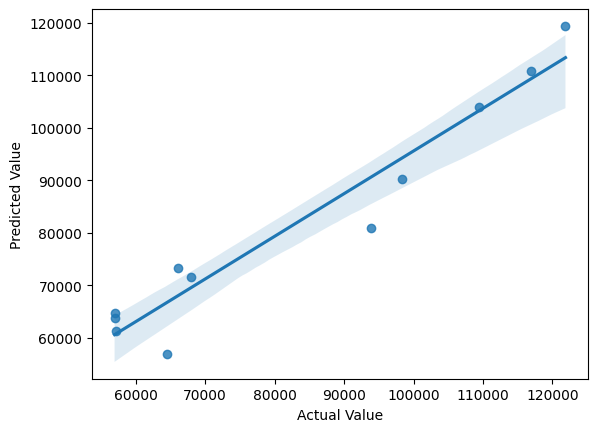

In [ ]:
sns.regplot(x='Actual Value',y='Predicted Value',data=df1)

**SLOPE & INTERCEPT**


*   
The slope and intercept of a linear regression model are important because they can be used to understand and predict the relationship between two variables. The slope of the line indicates the rate of change between the two variables, while the intercept indicates the value of the dependent variable when the independent variable is zero.
*   The slope and intercept can also be used to make predictions about future values



In [ ]:
print("intercept is:",model.intercept_)
print("Slope is:",model.coef_)
list(zip(X,model.coef_))

intercept is: 29602.07353482097
Slope is: [8555.33918938]


[(array([1.1]), 8555.339189378548)]

**Observation**:The intercept of 29602.07353482097 means that the predicted salary for a person with 0 years of experience is 29,602.07 . The slope of 8555.33918938 means that for every additional year of experience, the predicted salary increases by 8,555.34 .

**MODEL EVALUATION**

R2 score, mean absolute error (MAE), mean absolute percentage error (MAPE), and mean squared error (MSE) are metrics used to evaluate the accuracy of regression models.


1.**Mean Absolute Error(MAE)**: is the average of the absolute errors between the predicted and actual values. It is a measure of how close the model's predictions are to the actual values. A lower MAE indicates a more accurate model.

2.**Mean Absolute Percentage Error(MAPE)**: is the average of the absolute percentage errors between the predicted and actual values. It is a measure of how far off the model's predictions are, expressed as a percentage of the actual values. A lower MAPE indicates a more accurate model.

3.**Mean Squared Error(MSE)**: is the average of the squared errors between the predicted and actual values. It is a measure of how much variance there is between the predicted and actual values. A lower MSE indicates a more accurate model.

4.**Root mean squared error (RMSE)**: is a measure of the difference between predicted and actual values. It is calculated as the square root of the mean of the squared errors

5.**R2 score**: is a measure of how well the model fits the data. It is calculated as the proportion of the variance in the dependent variable that is explained by the independent variables. An R2 score of 1 indicates a perfect fit, while an R2 score of 0 indicates that the model does not explain any of the variance in the dependent variable.





In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error,r2_score
print("Mean absolute error is :",mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error is:",mean_absolute_percentage_error(y_test,y_pred))
print("Mean squared error is:",mean_squared_error(y_test,y_pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score is:",r2_score(y_test,y_pred))

Mean absolute error is : 6513.641570145157
Mean absolute percentage error is: 0.08573353553475364
Mean squared error is: 49647591.15111792
Root mean squared error is: 7046.1046792620045
R2 Score is: 0.9171426108885095


**Observations:**

* The results indicate that the model is relatively accurate.
* The mean absolute error (MAE) of 6,513.64 is relatively low, meaning that the model's predictions are  close to the actual values.
* The mean absolute percentage error (MAPE) of 0.0857 (is also relatively low), meaning that the model's predictions have an error of approximately 8.57% relative to the actual values
* The mean squared error (MSE) of 49,647,591.15 is higher than the MAE and MAPE, but it is still relatively low.
* The root mean squared error (RMSE) of 7,046.1 is slightly higher than the MAE and MAPE, but it is also relatively low.
* The R2 score of 0.917 is very high, indicating that the model explains a large amount of the variance in the data.
* In short, the model is able to make accurate predictions for most of the data points.




**CONCLUSION**

The results suggest that the model performs reasonably well, with relatively low errors and a high R2 score